# Decaimento Radioativo

Um problema recorrente é aquele do decaimento radioativo, onde um elemento decai para outro ao emitir radiação. Um modelo simples e eficiente para representar esse sistema físico é escrever a taxa de decaimento do material como sendo proporcional a quantidade dele que ainda não decaiu. Ou seja

$$\frac{du}{dt}=- a u$$

onde $u$ é a quantidade de material radioativo, $a$ é a taxa de decaimento radioativo e $t$ é o tempo. 
***
## Solução Analítica

É interessante que tenhamos a solução analítica para compararmos com nossa aproximação numérica. Podemos obter uma solução geral para esse problema apenas integrando a equação toda:

$$\ln{u}=at+C$$

Onde $C$ é uma constante de integração. Impomos então a condição inicial de que $u(0)=u_0$ para eliminarmos a constante arbitrária $C$, isolamos $u$ e ficamos com

$$u=u_0 e^{at}$$
***
## Solução Numérica

Vamos utilizar o método de Euler para resolver esse problema. Portanto, se você se lembra das aulas de Cálculo 1, lembra que a definição de derivada:

$$\frac{du}{dt}=\lim_{\Delta t \rightarrow 0}\frac{u(t+\Delta t)-u(t)}{\Delta t}$$

Nossa aproximação será que: **$\Delta t$ é tão pequeno, e tão próximo de $0$, que podemos retirar o limite da equação acima** e ficar apenas com

$$\frac{du}{dt}=\frac{u(t+\Delta t)-u( t)}{\Delta t}$$

**Isso significa que a medida que nosso $\Delta t$ cresce, nossa aproximação se torna mais e mais imprecisa.**

Substituindo a equação acima na original, temos

$$\frac{u(t+\Delta t)-u( t)}{\Delta t}=- a u$$

Logo

$$u(t+\Delta t)=u(t)- a u \Delta t$$

Se consideramos $t=t_0$ (onde $t_0$ é o tempo inicial), então podemos impor nossa condição inicial $u(t_0)=u_0$ e encontrar $u(t_0+\Delta t)$ com a equação acima. Podemos seguir fazendo isso quantas vezes desejarmos! Cada ponto que obtermos representará um ponto na nossa solução numérica.
***
### O Programa

Nós vamos usar os pacotes `numpy` para lidar com os *arrays* e o `matplotlib` para plotarmos nossa solução. O primeiro passo é importá-los no programa, podemos fazer isso usando o comando `import`

>```
import numpy as np
>```

Acima, nós apenas importamos o pacote `numpy` e o chamamos de `np` para abreviar e facilitar nossa vida (também é uma convenção abreviá-lo com este nome). Agora precisamos importar o `matplotlib`, porém, vamos importar apenas a sua função `matplotlib.pyplot` e para facilitar nossa vida a chamaremos de `plt`

>```python
ìmport matplotlib.pyplot as plt
>```

Incialmente, vamos definir $a=0.005$ e discretizar a linha do tempo em $nt=1000$ pontos

>```python
a=0.005
nt=1000
>```

Vamos usar a função `linspace()` do `numpy` para criar um vetor contendo $nt$ pontos no tempo, iniciando em $t=0$ e terminando em $t=1000$.

>```python
t=np.linspace(0,1000,nt)
>```

Mas porque queremos saber qual o $dt$ definido, adicionaremos o argumento `retstep=True` para que a função nos devolva, além do vetor, o espaçamento $dt$ entre dois pontos vizinhos nele


>```python
t, dt=np.linspace(0,1000,nt,retstep=True)
>```

Agora vamos adicionar um vetor $u$ para guardar as quantidades correspondentes ao valor da quantidade do elemento em cada passo no tempo.

$$u=[u(0),\, u(\Delta t),\, u(2\Delta t),\, u(3\Delta t),\, ...,\, u((nt-1)\Delta t)]$$ 

Note que o último elemento é o de número$(nt-1)$, pois temos $(nt)$ elementos e começamos com o zero. Como ainda não sabemos quais serão esses valores, criaremos esse vetor com todas as $nt$ componentes iguais a zero, apenas para reservar memória para elas. Para isso vamos usar a função `zeros((nt))` do `numpy`

>```python
u=np.zeros((nt))
>```

Por fim, antes de executar a iteração, precisamos impor o valor inicial de $u$. Inicialmente, colocaremos o valor como $u(0)=1.0$, podemos fazer isso da seguinte forma:

>```python
u[0]=1.0
>```

Até agora, seu código deve estar assim:

>```python
import numpy as np
import matplotlib.pyplot as plt
a=0.005
nt=100
t, dt=np.linspace(0,1000,nt,retstep=True)
u=np.zeros((nt))
u[0]=1.0
>```

Seguimos agora para o loop no tempo. Queremos evoluir o sistema $nt$ vezes no tempo, portanto, faremos um loop com o comando `for` em uma variável `i` e determinar seus parâmetros através do comando `range()`. Dentro do loop colocamos a equação que discretizamos acima

>```python
for i in range(0,nt-1):
    u[i+1]=u[i]+dt*a*u[i]
>```

Faremos o `i` indo de `0` até `nt-1` por causa do termo `u[i+1]`. **Note que se `i=nt-1`, a última iteração tentará acessar o elemento `u[nt]` mas esse elemento não existe! Isso porque apesar do vetor `u` ter `nt` elementos, o primeiro é `u[0]`!** Veja o exemplo abaixo onde temos em vermelho a indexação do python e em azul um vetor, também com `nt` elementos, mas que começa no elemento de número `1`

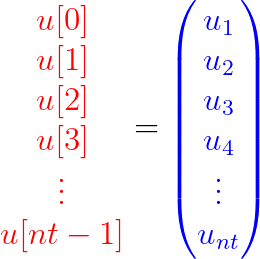

Por fim, utilizamos o comando `plt.plot(t,u)` para plotar o vetor `t` como eixo x e `u` como eixo y e, o comando `plt.show()` para mostrar o gráfico na tela

>```python
plt.plot(t,u)
plt.show()
>```

***

O programa final fica como abaixo

>```python
import numpy as np
import matplotlib.pyplot as plt
a=0.005
nt=100
t, dt=np.linspace(0,1000,nt,retstep=True)
u=np.zeros((nt))
u[0]=1.0
for i in range(0,nt-1):
    u[i+1]=u[i]+dt*a*u[i]
plt.plot(t,u)
plt.show()
>```